In [8]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import os, sys
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [9]:
## The dataset
txt_path = "D:\\workspace\\DeepLearning_codes\\AlphaReal\\data.txt"
#df = pd.read_csv(txt_path, sep='\t', lineterminator='\r')
df = pd.read_csv(txt_path, sep='\t')
print(df.head())
#df = df.drop(['Unsold','Completed','Starts'], axis=1)
#print(df.head())

  Date Time     MM  Price_index Unsold  Permits     JS JS_Ratio  Mort_Int  \
0  2003. 11 -0.449       74.180      -     6663 -1.025     56.9      6.04   
1  2003. 12 -0.451       74.578      -    34008 -0.414     56.6      6.28   
2  2004. 01  0.151       74.910      -     1795  0.208     56.6      6.29   
3  2004. 02  0.302       75.242      -     6977  0.622     56.8      6.15   
4  2004. 03  0.301       76.039      -     2171  0.206     57.2      5.98   

  Completed Starts Reg  
0         -      -  GG  
1         -      -  GG  
2         -      -  GG  
3         -      -  GG  
4         -      -  GG  


In [10]:
df.replace({'-': None},inplace =True)
#df['Completed'].replace({'-': None},inplace =True)
df = df.dropna()
df['Unsold'] = df['Unsold'].astype(str).astype(int)
df['Completed'] = df['Completed'].astype(str).astype(int)
df['Starts'] = df['Starts'].astype(str).astype(int)
print(df.head())

   Date Time     MM  Price_index  Unsold  Permits     JS JS_Ratio  Mort_Int  \
86  2011. 01  0.426       93.185   22153     3981  2.599     51.7      4.80   
87  2011. 02  0.425       93.916   21028     3459  3.130     52.7      4.86   
88  2011. 03  0.211       94.190   21162     8891  1.879     54.1      4.89   
89  2011. 04  0.000       94.281   19715     9058  0.000     55.1      4.88   
90  2011. 05  0.000       94.464   21303     5776  0.709     55.5      4.90   

    Completed  Starts Reg  
86       4275    1115  GG  
87       3242    3530  GG  
88       6546    4653  GG  
89       3649    5862  GG  
90       1552    5103  GG  


In [11]:
df.corr()

,MM,Price_index,Unsold,Permits,JS,Mort_Int,Completed,Starts
MM,1.000000,-0.429156,-0.171627,-0.042029,0.853459,0.352886,-0.131268,-0.017252
Price_index,-0.429156,1.000000,-0.085594,-0.002229,-0.605784,-0.781243,0.159286,0.040082
Unsold,-0.171627,-0.085594,1.000000,0.460120,-0.005702,0.090123,0.487217,0.465386
Permits,-0.042029,-0.002229,0.460120,1.000000,0.008564,-0.046493,0.618846,0.693061
JS,0.853459,-0.605784,-0.005702,0.008564,1.000000,0.458028,-0.145348,-0.000831
Mort_Int,0.352886,-0.781243,0.090123,-0.046493,0.458028,1.000000,-0.125187,-0.117784
Completed,-0.131268,0.159286,0.487217,0.618846,-0.145348,-0.125187,1.000000,0.613382
Starts,-0.017252,0.040082,0.465386,0.693061,-0.000831,-0.117784,0.613382,1.000000


In [21]:
#df = df[['MM','JS']]
df = df[['Permits','Starts','Completed']]

In [22]:
df.corr()

,Permits,Starts,Completed
Permits,1.000000,0.693061,0.618846
Starts,0.693061,1.000000,0.613382
Completed,0.618846,0.613382,1.000000


In [23]:
overall_pearson_r = df.corr().iloc[0:1] #"Permits" vs "Starts"
print(f"Pandas computed Pearson r: {overall_pearson_r}")

Pandas computed Pearson r:          Permits    Starts  Completed
Permits      1.0  0.693061   0.618846


In [24]:
#r, p = stats.pearsonr(df.dropna()['MM'], df.dropna()['JS'])
r, p = stats.pearsonr(df.dropna()['Permits'], df.dropna()['Starts'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Scipy computed Pearson r: 0.6930613799995701 and p-value: 4.6217002011232375e-243


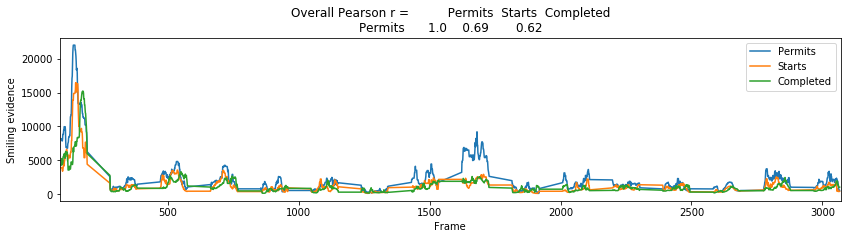

In [27]:
f,ax=plt.subplots(figsize=(14,3))
df.rolling(window=12,center=True).median().plot(ax=ax)
ax.set(xlabel='Frame',ylabel='Smiling evidence',title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

In [28]:
# Set window size to compute moving window synchrony.
r_window_size = 12
# Interpolate missing data.
df_interpolated = df.interpolate()

Text(0.5, 0.98, 'Smiling data and rolling window correlation')

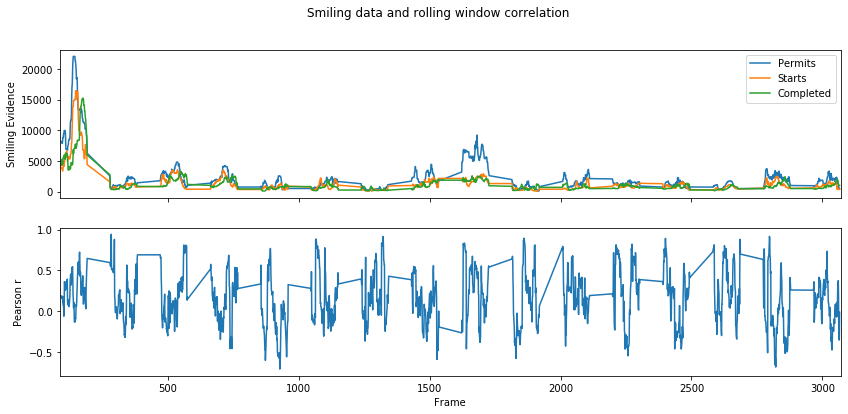

In [31]:
# Compute rolling window synchrony
#rolling_r = df_interpolated['MM'].rolling(window=r_window_size, center=True).corr(df_interpolated['JS'])
rolling_r = df_interpolated['Permits'].rolling(window=r_window_size, center=True).corr(df_interpolated['Starts'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df.rolling(window=12,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Smiling Evidence')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")